In [1]:
using MimiCIAM
using Mimi
using Plots
using CSV
using DataFrames
using NetCDF
using StatsBase
using KernelDensity

In [2]:
include("../downscaling.jl")

downscale_brick (generic function with 4 methods)

In [3]:
ais_t2 = CSV.read("component_csv/projections_antarctic_t2_yr2100.csv", DataFrame)
gsic_t2 = CSV.read("component_csv/projections_glaciers_t2_yr2100.csv", DataFrame)
gis_t2 = CSV.read("component_csv/projections_greenland_t2_yr2100.csv", DataFrame)
lws_t2 = CSV.read("component_csv/projections_landwater_storage_sl_t2_yr2100.csv", DataFrame)
te_t2 = CSV.read("component_csv/projections_thermal_t2_yr2100.csv", DataFrame)
gmsl_t2 = CSV.read("component_csv/projections_gmsl_t2_yr2100.csv", DataFrame)

ais_t3 = CSV.read("component_csv/projections_antarctic_t3_yr2100.csv", DataFrame)
gsic_t3 = CSV.read("component_csv/projections_glaciers_t3_yr2100.csv", DataFrame)
gis_t3 = CSV.read("component_csv/projections_greenland_t3_yr2100.csv", DataFrame)
lws_t3 = CSV.read("component_csv/projections_landwater_storage_sl_t3_yr2100.csv", DataFrame)
te_t3 = CSV.read("component_csv/projections_thermal_t3_yr2100.csv", DataFrame)
gmsl_t3 = CSV.read("component_csv/projections_gmsl_t3_yr2100.csv", DataFrame)


Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.177794,-0.180469,-0.29796,-0.233172,-0.174405,-0.183554,-0.207515,-0.192877,-0.166085,-0.160087,-0.165677,-0.189367,-0.0787807,-0.176693,-0.111222,-0.226678,-0.165386,-0.171196,-0.20397,-0.248293,-0.18881,-0.189503,-0.28459,-0.181515,-0.200444,-0.0658338,-0.174809,-0.212849,-0.118965,-0.15542,-0.209149,-0.146497,-0.196586,-0.181969,-0.147082,-0.143318,-0.234206,-0.214569,-0.185255,-0.16529,-0.276743,-0.167905,-0.186779,-0.167984,-0.217241,-0.249262,-0.217882,-0.214902,-0.30745,-0.170948,-0.115774,-0.204961,-0.236142,-0.183175,-0.136627,-0.128963,-0.113979,-0.281082,-0.254173,-0.277482,-0.186155,-0.28258,-0.135045,-0.134803,-0.198336,-0.220668,-0.271683,-0.21346,-0.225744,-0.158866,-0.252798,-0.228004,-0.104896,-0.260891,-0.238491,-0.206205,-0.226817,-0.235583,-0.213579,-0.136101,-0.160712,-0.128346,-0.189457,-0.205276,-0.192845,-0.245949,-0.252454,-0.200085,-0.196539,-0.233466,-0.214217,-0.135426,-0.168007,-0.214475,-0.113308,-0.204504,-0.109075,-0.230322,-0.0642265,-0.231958,⋯
2,-0.168088,-0.223932,-0.248422,-0.218211,-0.150753,-0.125553,-0.250325,-0.245895,-0.213232,-0.160422,-0.159001,-0.18955,-0.109907,-0.193994,-0.130347,-0.223114,-0.222594,-0.145502,-0.150199,-0.227672,-0.235076,-0.14504,-0.226316,-0.153275,-0.168846,-0.103049,-0.223389,-0.199275,-0.201831,-0.17529,-0.160117,-0.185734,-0.226753,-0.14229,-0.151484,-0.177248,-0.252636,-0.217727,-0.197727,-0.243636,-0.219129,-0.215513,-0.20591,-0.202954,-0.247653,-0.258503,-0.234194,-0.22561,-0.233391,-0.202538,-0.162309,-0.224204,-0.21617,-0.228827,-0.199112,-0.138875,-0.164328,-0.237951,-0.254703,-0.20962,-0.195453,-0.217859,-0.183358,-0.125539,-0.215196,-0.241314,-0.23635,-0.254726,-0.20128,-0.127284,-0.243245,-0.166433,-0.141013,-0.21789,-0.191525,-0.230627,-0.229288,-0.225309,-0.207061,-0.174876,-0.223636,-0.172248,-0.253029,-0.170256,-0.234537,-0.225518,-0.222763,-0.180734,-0.289476,-0.20419,-0.244351,-0.167233,-0.180095,-0.176864,-0.0861539,-0.234212,-0.160344,-0.20671,-0.111555,-0.201751,⋯
3,-0.186708,-0.200245,-0.2199,-0.205584,-0.153433,-0.123197,-0.209201,-0.211247,-0.223947,-0.136569,-0.145334,-0.191085,-0.114816,-0.160381,-0.0832098,-0.245857,-0.16899,-0.158765,-0.187886,-0.234302,-0.236813,-0.114606,-0.182323,-0.181232,-0.225049,-0.106287,-0.223257,-0.255069,-0.155821,-0.160831,-0.178793,-0.161013,-0.270036,-0.214417,-0.187165,-0.195009,-0.22958,-0.198826,-0.164307,-0.261858,-0.236797,-0.186428,-0.247913,-0.261213,-0.209144,-0.215773,-0.215391,-0.248331,-0.239215,-0.228275,-0.143263,-0.194099,-0.199475,-0.200317,-0.190415,-0.173548,-0.180871,-0.191679,-0.17831,-0.250949,-0.17395,-0.207539,-0.154837,-0.101622,-0.22747,-0.235885,-0.251939,-0.244981,-0.235337,-0.155464,-0.240456,-0.225135,-0.115415,-0.227836,-0.219096,-0.254347,-0.209869,-0.208211,-0.199475,-0.164406,-0.178692,-0.

In [4]:
size(ais_t3)

(451, 25446)

In [5]:
ensembles_run = 1:10091
lonlat_nyc = [(-73.892,40.605)]
comp_t2 = (1850:2300, Matrix(ais_t2), Matrix(gsic_t2), Matrix(gis_t2), Matrix(te_t2), Matrix(lws_t2), Matrix(gmsl_t2) )
result_t2 = downscale_brick(comp_t2, lonlat_nyc, ensembles_run, 2000, 2100, 5)

run_t2 = result_t2[1][:,:,1]
CSV.write("lslr_t2.csv", DataFrame(run_t2, :auto))

ensembles_run = 1:25446
lonlat_nyc = [(-73.892,40.605)]
comp_t3 = (1850:2300, Matrix(ais_t3), Matrix(gsic_t3), Matrix(gis_t3), Matrix(te_t3), Matrix(lws_t3), Matrix(gmsl_t3) )
result_t3 = downscale_brick(comp_t3, lonlat_nyc, ensembles_run, 2000, 2100, 5)

run_t3 = result_t3[1][:,:,1]
CSV.write("lslr_t3.csv", DataFrame(run_t3, :auto))



"lslr_t3.csv"

In [6]:
run_t2
run_t3


25446×21 Matrix{Float64}:
 0.0  0.014309   0.0309269  0.0430984  …  0.335538  0.348594  0.369117
 0.0  0.0108233  0.0261109  0.0428991     0.307126  0.31723   0.333529
 0.0  0.0173115  0.0273761  0.0446683     0.26811   0.276816  0.292248
 0.0  0.0189069  0.0311181  0.054044      0.305581  0.321279  0.337883
 0.0  0.0146871  0.0298301  0.045745      0.369997  0.389103  0.406919
 0.0  0.0122881  0.0211392  0.0402768  …  0.391363  0.420211  0.440513
 0.0  0.0183727  0.0307034  0.0498138     0.281828  0.296987  0.31668
 0.0  0.0155947  0.0269615  0.0401727     0.257986  0.271449  0.287085
 0.0  0.0137338  0.0257204  0.0438544     0.325561  0.344553  0.362202
 0.0  0.0136063  0.0294254  0.0436767     0.31351   0.330199  0.350952
 ⋮                                     ⋱                      ⋮
 0.0  0.0135547  0.0197218  0.0360726     0.358674  0.387622  0.421647
 0.0  0.017113   0.0273614  0.0400748     0.515736  0.566764  0.625912
 0.0  0.0115034  0.0243203  0.043047      0.469975  0.53618

In [22]:
u = []
vals = []
for i in 1:10091
    if run_t3[i,21] > 1
        push!(vals,i)
        push!(u,run_t2[i,21])
    end
end
vals


35-element Vector{Any}:
   258
  1119
  1576
  1835
  3611
  3939
  4113
  4208
  5531
  6366
     ⋮
 10045
 10048
 10050
 10052
 10053
 10061
 10063
 10064
 10088

In [8]:
A = Array{Float64,2}(undef,20,1)
B = run_t3[2,1:20]
C = findall(A.<=20)
A[C] = B
T = []
function getG(index)
    
    mimi_t3 = MimiCIAM.get_model(initfile = "nyc_init.csv")
    B = run_t3[index,1:20]
    C = findall(A.<=20)
    A[C] = B
    update_param!(mimi_t3,:slrcost,:lslr,A)
    update_param!(mimi_t3, :slrcost, :ntsteps, 20)
    run(mimi_t3)
    G = getdataframe(mimi_t3, :slrcost=>:NPVNoAdapt)
    H = Matrix(G)
    return H

end
for i in 1:32
    #rng = MersenneTwister(i)
    n = rand(Int8, 1, 25446)
    t = abs(n[i])
    H = getG(i)
    if H[15,3] > 40
        push!(T,H[:,3])
    end
end
T


Any[]

In [9]:

Array{Float64}(rand(Float64, (20, 1)))

20×1 Matrix{Float64}:
 0.11319461824255872
 0.43576060962507057
 0.5008852377200075
 0.5873279270408502
 0.23932982098710687
 0.32253384753454295
 0.23141383004379135
 0.9564635610086405
 0.91043076798263
 0.7949728314693278
 0.606800700598001
 0.9620650978699623
 0.34123270958043905
 0.19149985431291516
 0.4777831476482528
 0.57602882139254
 0.8313025216466443
 0.3424215986129384
 0.8944845609354222
 0.5080072641308198

In [10]:
T = []
A = Array{Float64}(rand(Float64, (20, 1)))
function getG(index)
    
    mimi_t3 = MimiCIAM.get_model(initfile = "nyc_init.csv")
    B = run_t3[index,1:20]
    C = findall(A.<=20)
    A[C] = B
    update_param!(mimi_t3,:slrcost,:lslr,A)
    update_param!(mimi_t3, :slrcost, :ntsteps, 20)
    run(mimi_t3)
    G = getdataframe(mimi_t3, :slrcost=>:NPVNoAdapt)
    H = Matrix(G)
    return H

end
for i in 1:32
    #rng = MersenneTwister(i)
    n = rand(Int8, 1, 25446)
    t = abs(n[i])
    r = vals[i]
    H = getG(r)
    push!(T,H[:,3])
end
T



BoundsError: BoundsError: attempt to access 1-element Vector{Any} at index [2]

In [11]:
T[1]

20-element Vector{Any}:
  1.3316703648877233
  1.3316703648877233
  1.3316703648877233
  1.3316703648877233
  5.9900384317791175
  5.9900384317791175
  5.9900384317791175
  5.9900384317791175
  5.9900384317791175
 12.761130450400868
 12.761130450400868
 12.761130450400868
 12.761130450400868
 12.761130450400868
 10.022615881393383
 10.022615881393383
 10.022615881393383
 10.022615881393383
  5.266556902138037
  5.266556902138037

In [12]:
for i in 1:32
    y = T[i]
    x = range(2000, 5, length=2100)
    b = plot!(y, legend = false)
end
title!("NPVNoAdapt Cost of New York for Threshold 3 degrees")
yaxis!("Millions of Dollars")
xaxis!("Year")

BoundsError: BoundsError: attempt to access 1-element Vector{Any} at index [2]

In [13]:
randn(,Int, 1)

ErrorException: syntax: unexpected ","

In [14]:
A = Array{Float64}(rand(Float64, (20, 1)))
function getP(index)
    
    mimi_t3 = MimiCIAM.get_model(initfile = "nyc_init.csv")
    B = run_t3[index,1:20]
    C = findall(A.<=20)
    A[C] = B
    update_param!(mimi_t3,:slrcost,:lslr,A)
    update_param!(mimi_t3, :slrcost, :ntsteps, 20)
    run(mimi_t3)
    G = getdataframe(mimi_t3, :slrcost=>:NPVOptimal)
    H = Matrix(G)
    return H[1,2]

end
opt = []
for i in 1:32
    n = vals[i]
    push!(opt,getP(n))
end


BoundsError: BoundsError: attempt to access 1-element Vector{Any} at index [2]

In [15]:
opt

1-element Vector{Any}:
 0.2590795622782695

In [16]:
A = Array{Float64}(rand(Float64, (20, 1)))
function getP(index)
    
    mimi_t2 = MimiCIAM.get_model(initfile = "nyc_init.csv")
    B = run_t2[index,1:20]
    C = findall(A.<=20)
    A[C] = B
    update_param!(mimi_t2,:slrcost,:lslr,A)
    update_param!(mimi_t2, :slrcost, :ntsteps, 20)
    run(mimi_t2)
    G = getdataframe(mimi_t2, :slrcost=>:NPVOptimal)
    H = Matrix(G)
    return H[1,2]

end
sopt = []
for i in 1:32
    push!(sopt,getP(i))
end
sopt

32-element Vector{Any}:
 0.2590795622782695
 0.23630582242617346
 0.22933990057682468
 0.25833363756621
 0.2698933825293354
 0.2369920292696787
 0.217978573344759
 0.24963485222543766
 0.24546676730316083
 0.2552599088027983
 ⋮
 0.2574904192014111
 0.24067420531597686
 0.24526573767068408
 0.2305007602980897
 0.24202265122780578
 0.28855294645895074
 0.23025855892800284
 0.22616318481067232
 0.24012123250851175

In [17]:
r3 = Vector{Float64}(opt)
r4 = Vector{Float64}(sopt)

32-element Vector{Float64}:
 0.2590795622782695
 0.23630582242617346
 0.22933990057682468
 0.25833363756621
 0.2698933825293354
 0.2369920292696787
 0.217978573344759
 0.24963485222543766
 0.24546676730316083
 0.2552599088027983
 ⋮
 0.2574904192014111
 0.24067420531597686
 0.24526573767068408
 0.2305007602980897
 0.24202265122780578
 0.28855294645895074
 0.23025855892800284
 0.22616318481067232
 0.24012123250851175

In [18]:
k3 = kde(r3)
k4 = kde(r4)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(0.16406523571728907:7.74678342526074e-5:0.3226418924323764, [0.0009901162956751364, 0.0009924466263999676, 0.0009960226348333379, 0.001000848304677504, 0.0010069287671647942, 0.0010142703048572344, 0.0010228803560838884, 0.0010327675199626185, 0.0010439415620044912, 0.001056413420336355  …  0.001035264635145472, 0.0010251063860170495, 0.0010162166732979871, 0.0010085880856638973, 0.001002214353546027, 0.0009970903470670756, 0.0009932120745803075, 0.0009905766817595585, 0.0009891824513135195, 0.000989028803230596])

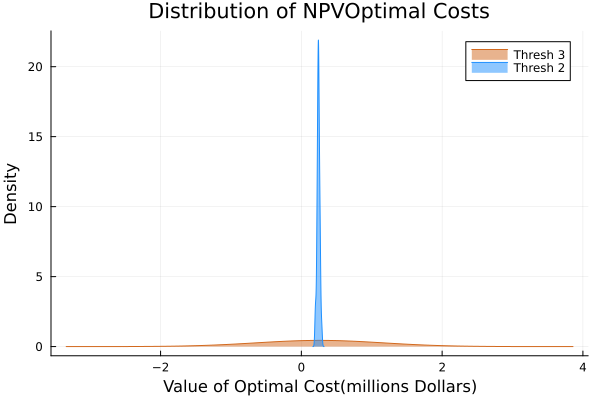

In [19]:
p = plot(k3.x, k3.density, label = "Thresh 3", fill = (0, 0.5), color = :chocolate)
plot!(p, k4.x, k4.density, label = "Thresh 2", fill = (0, 0.5), color = :dodgerblue)
title!(string("Distribution of NPVOptimal Costs"))
xlabel!("Value of Optimal Cost(millions Dollars)")
ylabel!("Density")

Running MimiCIAM with your new SLR:
1. initialize/build your model: your_model_name = MimiCIAM.get_model(...)
    
2. update the parameter:  update_param!(your_model_name, :slrcost, :lslr, your_new_slr_array)  
(make sure that you a running only the segment that you have slr for!)  
you may need to alter timesteps of MimiCIAM to match the ones you have downscaled (the # of column in lslr dataframe)  
to update timesteps, call: update_param!(your_model_name, :slrcost, :ntsteps, your_new_time_step)
    

3. call run again: run(your_model_name)

4. get your output!

5. Repeat! You will have to loop through your trials and update the slr param each time, but you should only have to  
build the model once, unless you want to change ssp, then you will have to initialize and build and new model with  
an init_file
